In [1]:
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pylab as pl

In [2]:
_data_dir = os.path.join('.', 'data')

In [3]:
def heatmap(df):
    sns.heatmap(df, xticklabels=df.columns, yticklabels=df.columns, cmap=cmap)

In [4]:
numeric_play_type = {
    'rush': 0,
    'pass': 1,
    'punt': 2,
    'field goal': 3
}

data = pd.read_csv(os.path.join(_data_dir, 'play_prediction.csv'))
data['drive_number'] = data.pop('drive_id')
data = data.drop(['play_id', 'gsis_id'], axis=1)
data.play_type = data.play_type.apply(lambda x: numeric_play_type[x])
data = data.loc[:, ['home_team', 'away_team', 'home_score', 'away_score', 'quarter', 'clock', 'down', 'yards_to_go', 'yardline', 'pos_team', 'drive_number', 'play_type']]
data.head()

,home_team,away_team,home_score,away_score,quarter,clock,down,yards_to_go,yardline,pos_team,drive_number,play_type
0,PIT,TEN,0,0,1,7,1,10,-8,PIT,1,1
1,PIT,TEN,0,0,1,44,2,5,-3,PIT,1,0
2,PIT,TEN,0,0,1,85,3,8,-6,PIT,1,1
3,PIT,TEN,0,0,1,93,4,8,-6,PIT,1,2
4,PIT,TEN,0,0,1,104,1,10,-48,TEN,2,0


In [5]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

In [6]:
correlation = data.corr('pearson')
correlation

,home_score,away_score,quarter,clock,down,yards_to_go,yardline,drive_number,play_type
home_score,1.000000,0.371019,0.663618,0.186824,-0.008471,0.005998,0.031743,0.659307,0.008697
away_score,0.371019,1.000000,0.646289,0.182875,-0.005687,0.008679,0.028522,0.650890,0.014473
quarter,0.663618,0.646289,1.000000,0.027472,0.007769,0.013518,0.042198,0.916582,0.001366
clock,0.186824,0.182875,0.027472,1.000000,0.024885,-0.000174,0.099297,0.243254,0.054580
down,-0.008471,-0.005687,0.007769,0.024885,1.000000,-0.249781,0.052253,-0.008201,0.563461
yards_to_go,0.005998,0.008679,0.013518,-0.000174,-0.249781,1.000000,-0.226764,0.025677,0.014464
yardline,0.031743,0.028522,0.042198,0.099297,0.052253,-0.226764,1.000000,0.011706,0.038434
drive_number,0.659307,0.650890,0.916582,0.243254,-0.008201,0.025677,0.011706,1.000000,-0.000998
play_type,0.008697,0.014473,0.001366,0.054580,0.563461,0.014464,0.038434,-0.000998,1.000000


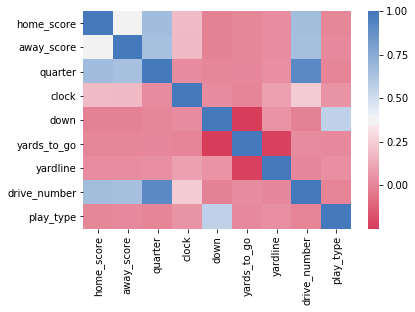

In [7]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap=cmap)

# Tennessee

* Tennessee's play type is correlated to down at the same rate as the league's play type is to down. They are average.
* Tennessee's yardline (field position) is more strongly correlated to their score and their opponents score than the league in general.
* Tennessee's play type is more strongly correlated with their score and their opponent's score than the league in general.
    - This suggests that Tennessee's play calling is more predictable than the league in general.

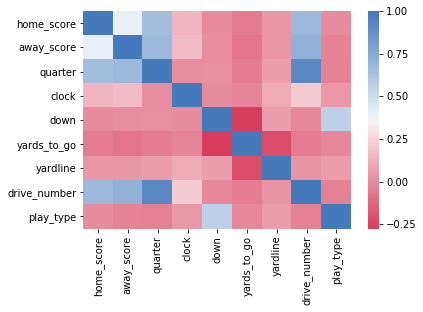

In [8]:
tn = data.loc[data.pos_team == 'TEN']
tn = data.loc[data.home_team == 'TEN']
tn = tn.corr('pearson')
heatmap(tn)

# New England

* New England's play type is less correlated with down than the league in general's.
    - This means that New England's play calling is less predictable than other teams.
* New England's yardline is more strongly correlated with their score and drive number.
    - This suggests that New England more than TN has better field position as the game progresses.
* New England's yards to go is more strongly correlated with the away team score.
    - New England plays to the level of their opponent more than TN.

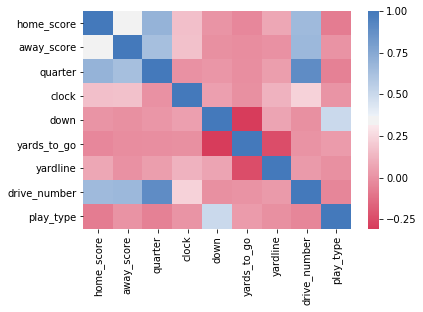

In [9]:
ne = data.loc[data.pos_team == 'NE']
ne = ne.loc[ne.home_team == 'NE']
ne_corr = ne.corr('pearson')
heatmap(ne_corr)

In [10]:
display(correlation)
display(tn)
display(ne_corr)

,home_score,away_score,quarter,clock,down,yards_to_go,yardline,drive_number,play_type
home_score,1.000000,0.371019,0.663618,0.186824,-0.008471,0.005998,0.031743,0.659307,0.008697
away_score,0.371019,1.000000,0.646289,0.182875,-0.005687,0.008679,0.028522,0.650890,0.014473
quarter,0.663618,0.646289,1.000000,0.027472,0.007769,0.013518,0.042198,0.916582,0.001366
clock,0.186824,0.182875,0.027472,1.000000,0.024885,-0.000174,0.099297,0.243254,0.054580
down,-0.008471,-0.005687,0.007769,0.024885,1.000000,-0.249781,0.052253,-0.008201,0.563461
yards_to_go,0.005998,0.008679,0.013518,-0.000174,-0.249781,1.000000,-0.226764,0.025677,0.014464
yardline,0.031743,0.028522,0.042198,0.099297,0.052253,-0.226764,1.000000,0.011706,0.038434
drive_number,0.659307,0.650890,0.916582,0.243254,-0.008201,0.025677,0.011706,1.000000,-0.000998
play_type,0.008697,0.014473,0.001366,0.054580,0.563461,0.014464,0.038434,-0.000998,1.000000


,home_score,away_score,quarter,clock,down,yards_to_go,yardline,drive_number,play_type
home_score,1.000000,0.406562,0.653789,0.151854,0.001875,-0.047363,0.039141,0.679785,0.004652
away_score,0.406562,1.000000,0.678751,0.177527,0.012278,-0.075176,0.040880,0.711889,-0.022539
quarter,0.653789,0.678751,1.000000,0.010017,0.013601,-0.045955,0.065375,0.915440,-0.027646
clock,0.151854,0.177527,0.010017,1.000000,0.004772,-0.018484,0.110184,0.224043,0.043831
down,0.001875,0.012278,0.013601,0.004772,1.000000,-0.275683,0.068568,-0.008066,0.559614
yards_to_go,-0.047363,-0.075176,-0.045955,-0.018484,-0.275683,1.000000,-0.212590,-0.042393,-0.010443
yardline,0.039141,0.040880,0.065375,0.110184,0.068568,-0.212590,1.000000,0.037257,0.058355
drive_number,0.679785,0.711889,0.915440,0.224043,-0.008066,-0.042393,0.037257,1.000000,-0.030311
play_type,0.004652,-0.022539,-0.027646,0.043831,0.559614,-0.010443,0.058355,-0.030311,1.000000


,home_score,away_score,quarter,clock,down,yards_to_go,yardline,drive_number,play_type
home_score,1.000000,0.326523,0.696830,0.164928,0.015352,-0.032218,0.079916,0.658519,-0.075495
away_score,0.326523,1.000000,0.636293,0.172225,-0.002453,-0.013118,0.003552,0.671930,0.010160
quarter,0.696830,0.636293,1.000000,0.004352,0.019147,-0.006556,0.050215,0.897791,-0.051825
clock,0.164928,0.172225,0.004352,1.000000,0.053717,-0.000248,0.122288,0.231702,0.012288
down,0.015352,-0.002453,0.019147,0.053717,1.000000,-0.305716,0.067972,0.000212,0.501135
yards_to_go,-0.032218,-0.013118,-0.006556,-0.000248,-0.305716,1.000000,-0.240877,0.007382,0.038797
yardline,0.079916,0.003552,0.050215,0.122288,0.067972,-0.240877,1.000000,0.032487,-0.000160
drive_number,0.658519,0.671930,0.897791,0.231702,0.000212,0.007382,0.032487,1.000000,-0.040169
play_type,-0.075495,0.010160,-0.051825,0.012288,0.501135,0.038797,-0.000160,-0.040169,1.000000


# Yards to go Correlation to Play Type by Down

As downs increase, play type becomes more correlated with yards to go for first down.

In [11]:
ne_1 = ne.loc[ne.down == 1].loc[:, ['yards_to_go', 'play_type']]
ne_2 = ne.loc[ne.down == 2].loc[:, ['yards_to_go', 'play_type']]
ne_3 = ne.loc[ne.down == 3].loc[:, ['yards_to_go', 'play_type']]

display(ne_1.corr('pearson'))
display(ne_2.corr('pearson'))
display(ne_3.corr('pearson'))

,yards_to_go,play_type
yards_to_go,1.000000,0.124235
play_type,0.124235,1.000000


,yards_to_go,play_type
yards_to_go,1.000000,0.189547
play_type,0.189547,1.000000


,yards_to_go,play_type
yards_to_go,1.000000,0.276538
play_type,0.276538,1.000000


# Principal Component Analysis

There is good separation of the classes when plotted against 2 principal components. The rush and pass overlap as is to be expected since rushes and passes happen
in any quarter, clock, down, or yards to go situation. Punt and field goal are well-separated from rush and pass and from one another with the field goal and punt overlapping on the edges of their divisions.

explained variance ratio (first two components): [0.31276311 0.25723823]


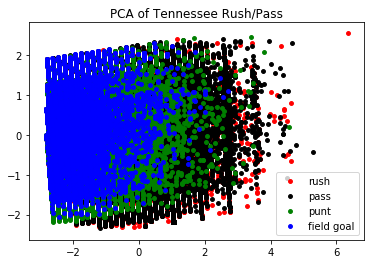

In [12]:
x = data.copy()
x = StandardScaler().fit_transform(data.loc[:, ['quarter', 'clock', 'down', 'yards_to_go']])
y = data.play_type

pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

# Percentage of variance explained for each components
print('explained variance ratio (first two components):', pca.explained_variance_ratio_)

target_names = ['rush', 'pass', 'punt', 'field goal']

pl.figure()
for c, i, target_name in zip("rkgb", [0,1,2,3], target_names):
    pl.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name, s=15)
pl.legend()
pl.title('PCA of Tennessee Rush/Pass')

pl.show()